<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет,  Марк! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы». 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [1]:
# Импортирование библиотек:
import pandas as pd
import matplotlib.pyplot as plt
import catboost
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_validate

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

In [2]:
df = pd.read_csv('/datasets/taxi.csv', index_col=[0],parse_dates=[0])
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB
None


,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


In [3]:
df

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
...,...
2018-08-31 23:10:00,32
2018-08-31 23:20:00,24
2018-08-31 23:30:00,27


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Отлично, при загрузке сразу обрабатываются даты</div>

## Анализ

In [3]:
# Проивзедём проверку на монотонность:
df.index.is_monotonic

True

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

In [4]:
# Произведём ресемплинг по 1 часу:
df = df.resample('1H').sum()

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Да, ресемплирование выполнено верно. И хорошо, что в качестве агрегирующей функции ты используешь сумму, её проще интерпретировать. </div>

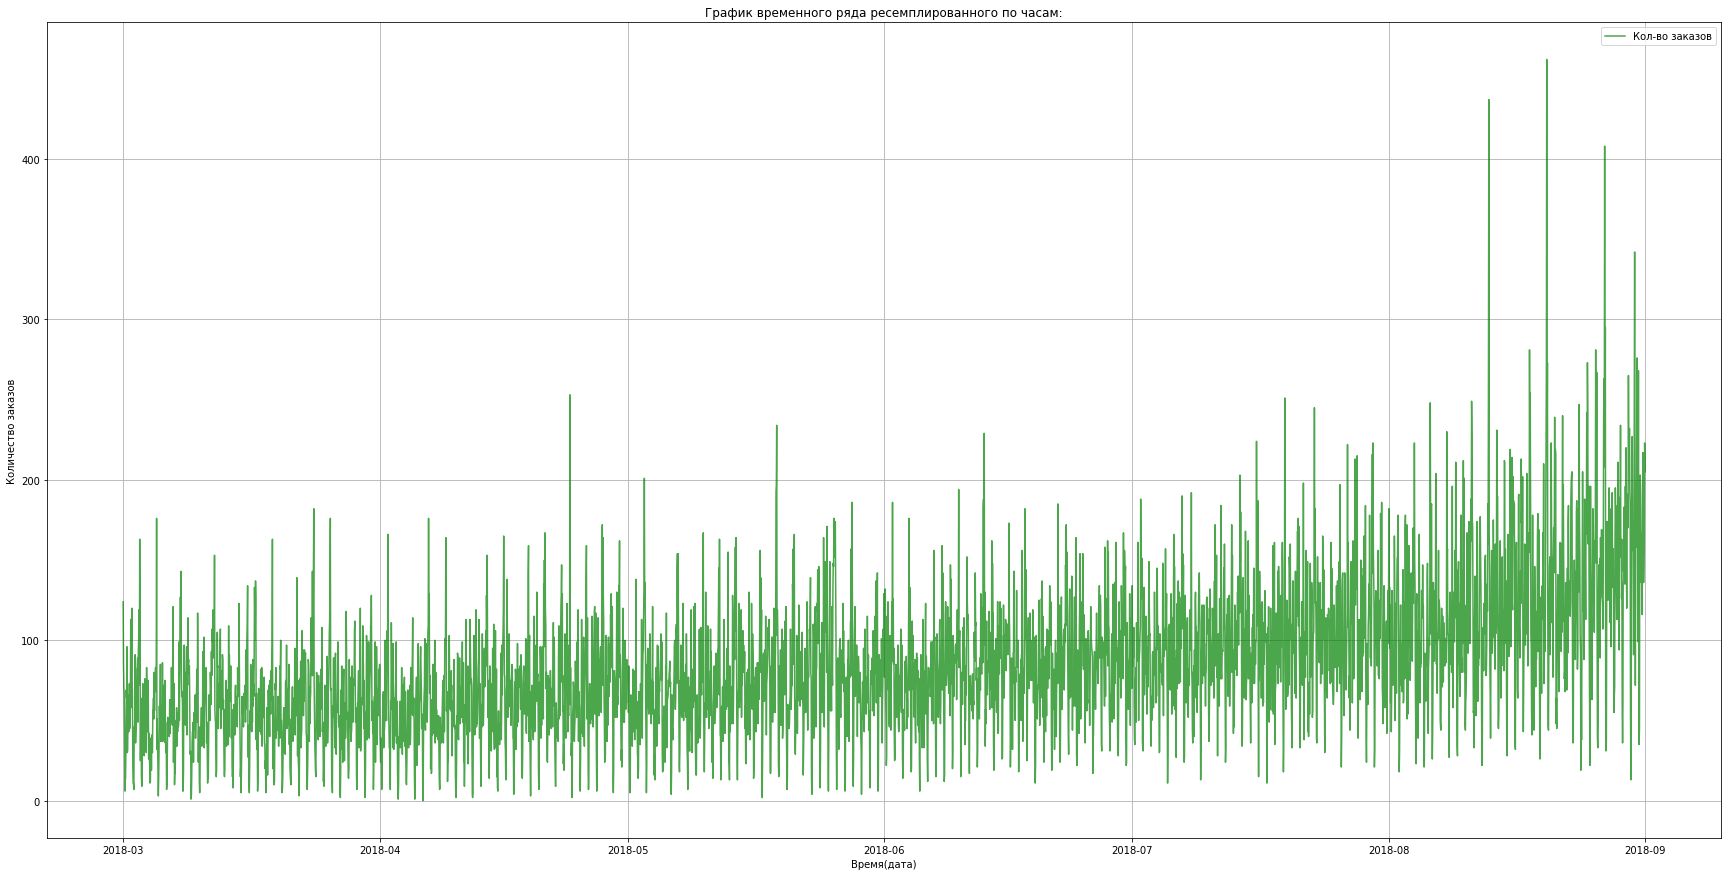

In [5]:
fig, ax = plt.subplots()
ax.plot(df.resample('1H').mean(), color='g', alpha=0.7, label=('Кол-во заказов'))
plt.title('График временного ряда ресемплированного по часам:')
plt.legend()
ax.set_xlabel('Время(дата)')
ax.set_ylabel('Количество заказов')
fig.set_size_inches(30, 15)
plt.grid()
plt.show()

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
<b>v2</b>    
    
Хочу напомить, что по правилам оформления проектов у всех графиков и визуализаций должно быть навания, а также подписаны оси (там где они есть).
    
    
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v3</b> исправлено </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Рекомендую вывести график временного ряда (ресемплированного по часам). Можно наложить на него усредненные данные (например за сутки и неделю), это позволит лучше понять данные.</div>

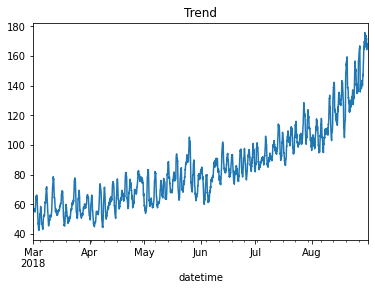

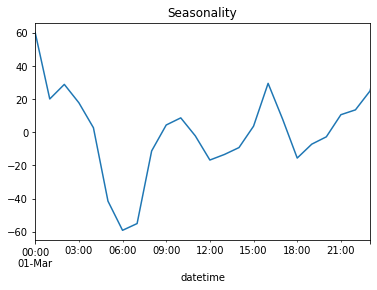

In [6]:
seasonal_decompose(df).trend.plot(ax=plt.gca())
plt.title('Trend')
plt.show()

seasonal_decompose(df).seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.xlim('2018-03-01 00:00:00', '2018-03-01 23:00:00')
plt.show()

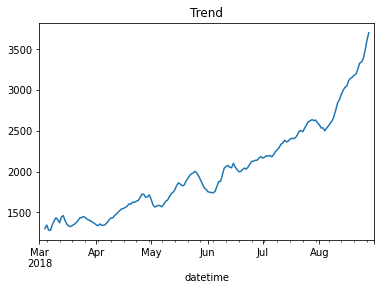

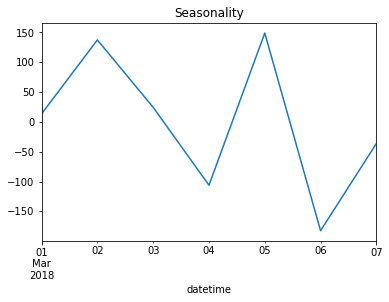

In [7]:
df_1 = df.resample('1D').sum()

seasonal_decompose(df_1).trend.plot(ax=plt.gca())
plt.title('Trend')
plt.show()

seasonal_decompose(df_1).seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.xlim('2018-03-01 00:00:00', '2018-03-07 00:00:00')
plt.show()

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Есть декомпозиция на тренд и сезонность. Молодец, что вывел график суточной сезонности за сутки. Так можно понять, как меняется уровень количества поездок в течение суток.</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Совет: в данных кроме суточной есть недельная сезонность. Чтобы увидеть её нужно сделать ресемплинг данных по суткам и вновь сделать декомпозицию на сезонность и тренд. Дело в том, что seasonal_decompose настраивается на сезонность с самым маленьким циклом, при ресемпле данных по часу это сутки, при ресемпле по суткам это неделя. </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Закончен важный и интересный раздел - исследовательский анализ данных. Важно завершить этот раздел выводами. Что интересного и полезного мы узнали о данных?
    
</div>

Вывод:
Мы имеем дело с временным рядом, данные представлены с 1 марта 2018 года, по 31 августа 2018 года. Изначально данные были измерены с частотой в каждые 10 минут, что не подходило для анализа, поэтому было проведено ресемплирование по часам и суткам, при изучении декомпозиций которых была обнаружена суточная и недельная сезонность: К ночи кол-во заказов резко повышается и так же быстро падает к утру. Пик заказов приходится на 2 и 5 дни недели. Так же присутствует плавно возрастающий тренд.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
<b>v2</b>    
    
К сожалению выводы содержат мало полезной и содержательной информации. Попобуй ответить на вопросы:
    
 - С какими данными мы имеем дело? С какой частотой измерены наши данные? За какой период есть данные
 - Есть ли в во временном ряду тренд (меняется ли средний уровень со временем)
 - Можем ли мы наблюдать сезонность в наших данных. Какую?
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v3</b> Да, сейчас выводы более подробные и содержательные. </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Создание признаков - это уже часть пайплайна создания решения и выходит за границы анализа. Прошу перенести создание признаков в следующий раздел.
    
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Создание признаков для решения задачи - это важнейший этап, от которого зависит, сможешь ли ты обучить модели или нет. Поэтому что если в признаках есть полезный сигнал, то найти статистическую взаимоствязь между признаками и таргетом сможет любая модель.  А если признаки пустые и неинформативные, то никакая модель не сможет приемлимое качество решения.
    
А создание признаков должно быть основано на проведенном исследовании и его результатах. Ниже я тебе показу, как можно изменить создание признаков, чтобы они стали действительно полезными.    
</div>

## Обучение

In [8]:
def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))
    

def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

data_analyze_trigonometric = df.copy()
data_analyze_trigonometric['hour'] = data_analyze_trigonometric.index.hour
data_analyze_trigonometric['day'] = data_analyze_trigonometric.index.day
data_analyze_trigonometric["hour_cos"] = cos_transformer(24).fit_transform(data_analyze_trigonometric)["hour"]
data_analyze_trigonometric["hour_sin"] = sin_transformer(24).fit_transform(data_analyze_trigonometric)["hour"]
data_analyze_trigonometric["weekday_cos"] = cos_transformer(24).fit_transform(data_analyze_trigonometric)["day"]
data_analyze_trigonometric["weekday_sin"] = sin_transformer(24).fit_transform(data_analyze_trigonometric)["day"]

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
<b>v2</b>       
    
Здесь я вижу ряд ошибок, который скорее всего помешали тебе достичь хорошего результата
    
 - Если ты испльзуешь тригонометрическое преобразование, то исходные признаки нам уже не нужны. Как и не нужно их OHE представление. Тут либо одно кодирование, либо другое.
 - Обрати внимание, я советовал тебе использовать признак "день недели", а не "номер дня внутри месяца".  Ведь в наших данных есть сезонность внутри недели.
 - При копировании допущена ошибка и дважды используется  sin_transformer вместо cos_transformer
    
 - Использование тригонометрического преобразования не отменет необходимость исползовать скользящее среднее и отстающие знаения. Без них достичь нормальных метрик не получится.    
</div>

In [9]:
# Разделение выборки:
train_1, test_1 = train_test_split(data_analyze_trigonometric, shuffle=False, test_size=0.1)
train_1 = train_1.dropna()

train_features_1 = train_1.drop(['num_orders'],axis=1)
train_target_1 = train_1['num_orders']

train_features_1, valid_features_1, train_target_1, valid_target_1  = train_test_split(train_features_1, train_target_1, shuffle=False, test_size=0.1)

test_features_1 = test_1.drop(['num_orders'],axis=1)
test_target_1 = test_1['num_orders']

In [10]:
def evaluate(model, X, y, cv):
    cv_results = cross_validate(
        model,
        X,
        y,
        cv=cv,
        scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"],
    )
    rmse = -cv_results["test_neg_root_mean_squared_error"]
    print(f"Root Mean Squared Error: {rmse.mean():.3f}")
    return rmse.mean()
    

In [11]:
one_hot_encoder = OneHotEncoder(handle_unknown="ignore")
alphas = np.logspace(-6, 6, 25)
ts_cv = TimeSeriesSplit(n_splits=3)
categorical_columns = ['hour', 'day']

cyclic_cossin_transformer = ColumnTransformer(
    transformers=[
        ("categorical", one_hot_encoder, categorical_columns),
        ("day_sin", sin_transformer(7), ["day"]),
        ("day_cos", cos_transformer(7), ["day"]),
        ("hour_sin", sin_transformer(24), ["hour"]),
        ("hour_cos", cos_transformer(24), ["hour"]),
    ],
    remainder=MinMaxScaler(),
)
cyclic_cossin_linear_pipeline = make_pipeline(
    cyclic_cossin_transformer,
    RidgeCV(alphas=alphas),
)
result = evaluate(cyclic_cossin_linear_pipeline, X=train_features_1, y=train_target_1, cv=ts_cv)

Root Mean Squared Error: 32.137


In [12]:
cyclic_cossin_linear_pipeline.fit(train_features_1, train_target_1)
cyclic_cossin_linear_predictions = cyclic_cossin_linear_pipeline.predict(valid_features_1)

In [13]:
# Подготовка к анализу:
def features_builder(data, lag_max, k):
    data = data.copy()
    data['hour'] = data.index.hour
    data['weekday'] = data.index.weekday
    
    for i in range(1, lag_max+1):
        data['i_{}'.format(i)] = data['num_orders'].shift(i)
    data['rolling_mean'] = data['num_orders'].shift().rolling(k).mean()
    return data

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
<b>v2</b>       
    
Я советовал тебе использовать признак "день недели" и убрать признак "номер дня внутри месяца".  Ты сделал наоборот - удалил полезный признак "деь недели" и оставил ненужный признак "день внутри месяца.
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
👍 Хорошо, что в признаки ты выносишь день недели, в данных есть недельная сезонность.
        
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
В наших данных наблюдается очень четкая сезонность внутри дня. Рекомендую использовать информацию о часе в качестве признака.

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
А вот календарные признаки "месяц" и "год" лучше удалить.  Данных у нас немного, всего 6 месяцев. При этом данные тренда мы учтем с помощью скользящего среднего и отстающих значений.
</div>


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Заодно предлгаю  удалить признак "день" (порядковый номер дня внутри месяца), т.к. сезонность внутри месяца мы не обнаружили. 

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 
    
 Можно попробовать рассмотреть признаки "час" и "день недели" как категориальные, а не числовые. Или создать на их основе периодические признаки с помощью тригонометрических функций (https://scikit-learn.org/stable/auto_examples/applications/plot_cyclical_feature_engineering.html). Но это вообще высший пилотаж )))   
    
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
Попытался разобраться, но чувствую, что не очень получилось, но тема в документации довольно интересная, спасибо, что ознакомили.
</div>

In [14]:
data_analyze = features_builder(df, 168, 168)

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    
    
Гиперпараметры max_lag, rolling_mean_size очень важны.  Возможно это самые важные гиперпараметры в проекте, больше всего влияющие на результат.
    
Выбирая значения для размера окна и количества отстающих значений важно использовать известную нам информацию о сезонности. А сезонность у нас есть суточная и недельная. Поэтому рекомендую взять их кратными суткам, а лучше равные неделе.
    
 - Скользящее среднее является олицетворением тренда, и если взять его равным суткам, то оно становится достаточно гладким (из него уходитят колебания, вызванные суточной сезонностью), а если взять равное неделе - то еще ровнее. Это хорошо видно пографикам со скользящим средним, если ты посмотришь из за сутки и неделю.
 
 - На использовании отстающих значений и авторегрессии временного ряда основано много методов прогнозироания временных рядов (например ARIMA). И здесь тоже работает принцип - чем больше признаков - тем выше качество. Но разумным компромисом является использование достаточного количества признаков, такого, где автокореляция является значимой. И такими точками как раз служат сутки и неделя. 
    
    
    
Резюме: попробуй исползьзовать гиперпараметры max_lag, rolling_mean_size равными 24 (сутки)  или 168 (неделя).  Последнее значительно увеличивает качество предсказаний, но модели могут учиться дольше. 
    
    
</div>

In [15]:
# Разделение выборки:
train, test = train_test_split(data_analyze, shuffle=False, test_size=0.1)
train = train.dropna()

train_features = train.drop(['num_orders'],axis=1)
train_target = train['num_orders']

train_features, valid_features, train_target, valid_target  = train_test_split(train_features, train_target, shuffle=False, test_size=0.1)

test_features = test.drop(['num_orders'],axis=1)
test_target = test['num_orders']

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Корректное разбиение, данные не перемешиваются. </div>

In [16]:
%time
model = catboost.CatBoostRegressor()

grid = {'learning_rate': [0.01, 0.03], 'depth': [6, 10], 'l2_leaf_reg': [7, 9]}

tscv = TimeSeriesSplit(n_splits=3)

grid_search_result = model.grid_search(grid, X=train_features, cv=tscv,y=train_target,verbose=False)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 17.6 µs
0:	learn: 77.3576070	test: 104.2984053	best: 104.2984053 (0)	total: 98ms	remaining: 1m 37s
1:	learn: 76.7151314	test: 103.5831649	best: 103.5831649 (1)	total: 132ms	remaining: 1m 5s
2:	learn: 76.1033603	test: 102.9174068	best: 102.9174068 (2)	total: 166ms	remaining: 55.3s
3:	learn: 75.4695845	test: 102.1616670	best: 102.1616670 (3)	total: 200ms	remaining: 49.8s
4:	learn: 74.8239145	test: 101.3746370	best: 101.3746370 (4)	total: 240ms	remaining: 47.8s
5:	learn: 74.2049865	test: 100.7250753	best: 100.7250753 (5)	total: 275ms	remaining: 45.5s
6:	learn: 73.5765272	test: 100.0467425	best: 100.0467425 (6)	total: 311ms	remaining: 44.1s
7:	learn: 72.9637535	test: 99.3285084	best: 99.3285084 (7)	total: 353ms	remaining: 43.8s
8:	learn: 72.4013522	test: 98.6607913	best: 98.6607913 (8)	total: 397ms	remaining: 43.7s
9:	learn: 71.7956394	test: 97.9935338	best: 97.9935338 (9)	total: 430ms	remaining: 42.6s
10:	learn: 71.2252933	test: 97.3

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Молодец, корректная кросс-валидация для временых рядов требует TimeSeriesSplit. </div>

In [17]:
grid_search_result['params']

{'depth': 6, 'l2_leaf_reg': 7, 'learning_rate': 0.03}

In [18]:
%time
model = catboost.CatBoostRegressor(learning_rate=0.03,iterations=1000,depth=6,l2_leaf_reg=7,verbose=200)
model.fit(train_features,train_target)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs
0:	learn: 35.6139442	total: 54.2ms	remaining: 54.2s
200:	learn: 18.2248693	total: 6.61s	remaining: 26.3s
400:	learn: 16.8356906	total: 13.2s	remaining: 19.7s
600:	learn: 15.3435504	total: 23.4s	remaining: 15.5s
800:	learn: 14.0754410	total: 30s	remaining: 7.44s
999:	learn: 12.8330473	total: 36.4s	remaining: 0us


In [19]:
valid_predict = model.predict(valid_features)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Не стоит раньше времени подглядывать в тестовую выборку. Вначале обучим все модели и выберем лучшую по оценкам на крос-валидации и только потом протестируем лучшую модель.

Также не стоит использовать обучающую выборку для оценки модели . Если следовать этой стратегии, мы выберем ту модель, которая сумела лучше зазубрить правильные ответы (переобучиться на обучающую выборку), но не ту модель, которая умеет лучше предсказывать на новых данных.


Правильным решением будет использовать валидационную выборку или оценку с помощью кросс-валидации. Если бы ты использовать поиск по сетке из sklearn, то можно было бы воспользоваться атрибутом best_score_
    
Но т.к. ты использовал поиск по сетке,встроеный в кэтбуст, попробуй посчитать оценку по кросс-валидации, извлекая её из объекта  grid_search_result  
    
    
    
    
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> исправлено, использована валидационная выборка </div>

In [20]:
model_lr = LinearRegression()
model_lr.fit(train_features,train_target)

valid_predict_lr = model_lr.predict(valid_features)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Пожалуйста используй оценку модели, полученую с помощью кросс-валидации или на валидационной выборке для выбора лучшей модели. 
    
    
    
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> исправлено, использована валидационная выборка </div>

In [21]:
table = {'model_names':['LinearRegression','CatBoostRegressor', 'cyclic_cossin_linear_pipeline'],
        'RMSE_valid':[mean_squared_error(valid_target, valid_predict_lr) ** 0.5, mean_squared_error(valid_target, valid_predict) ** 0.5, mean_squared_error(valid_target_1, cyclic_cossin_linear_predictions) ** 0.5]}
table = pd.DataFrame(table)
table

,model_names,RMSE_valid
0,LinearRegression,28.117669
1,CatBoostRegressor,28.649667
2,cyclic_cossin_linear_pipeline,51.734305


Лучшие показатели по метрике RMSE имеет модель CatBoostRegressor

In [22]:
# Выполним проверку на тестовойвыборке:
mean_squared_error(test_target, model.predict(test_features)) ** 0.5

43.44192865759221

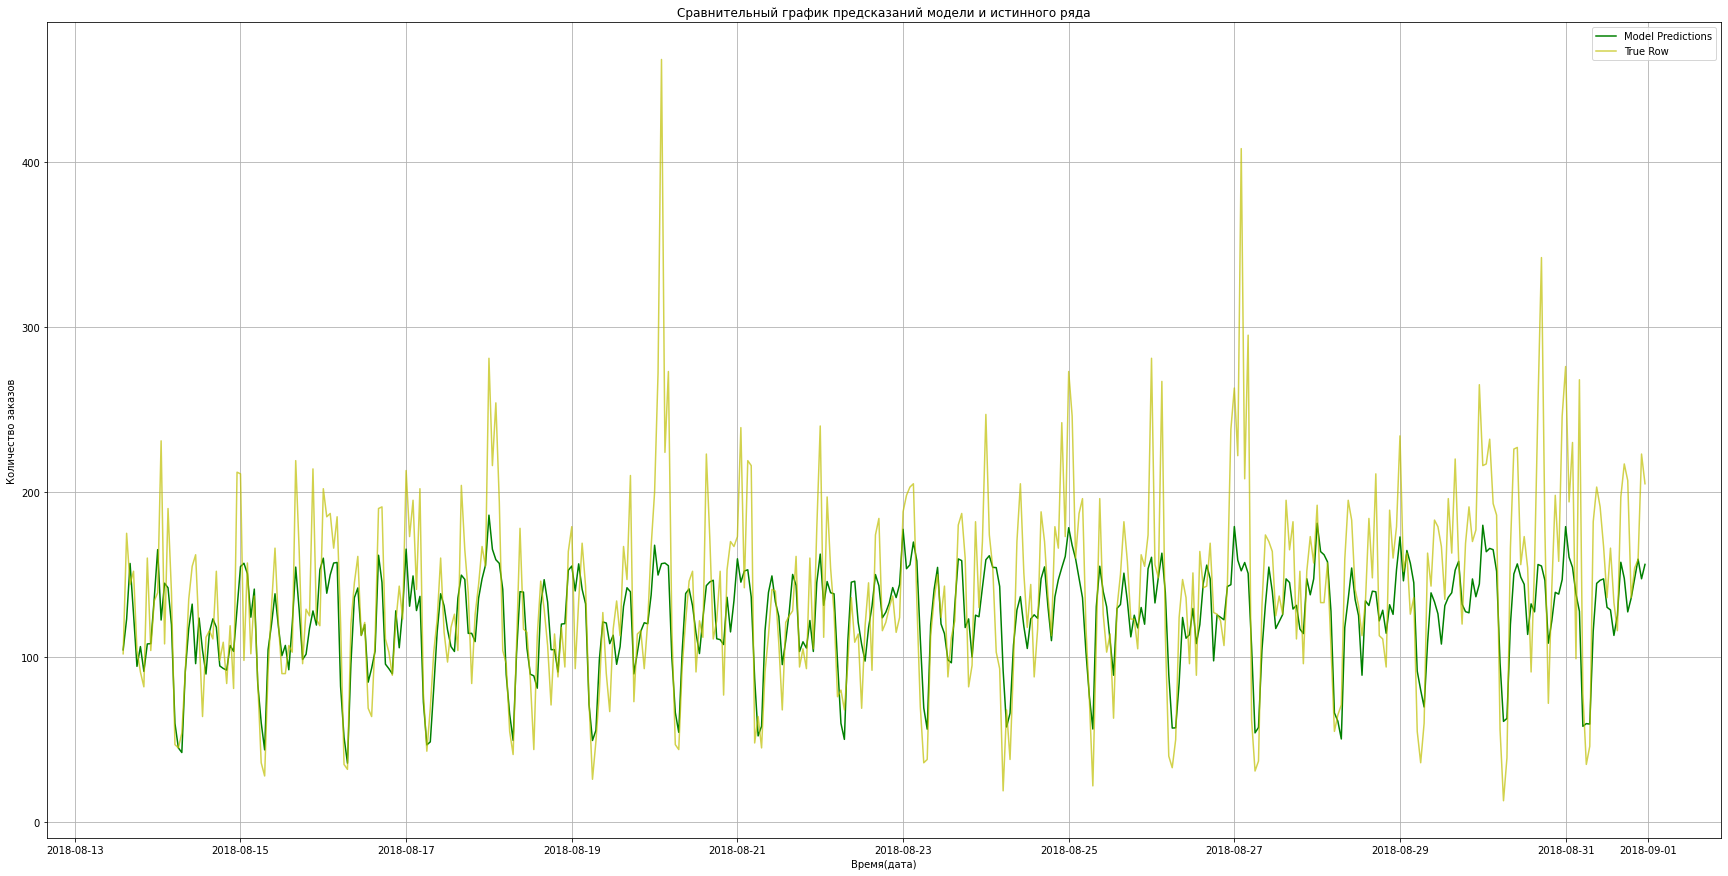

In [23]:
# Рассмотрим графики истинных значений и предсказанных:
predict = model.predict(test_features)
predict = pd.Series(predict)
predict.index = test_target.index

fig, ax = plt.subplots()
ax.plot(pd.Series(predict), color='g', label=('Model Predictions'))
ax.plot(pd.Series(test_target), color='y', alpha = 0.7, label=('True Row'))
plt.title('Сравнительный график предсказаний модели и истинного ряда')
plt.legend()
ax.set_xlabel('Время(дата)')
ax.set_ylabel('Количество заказов')
fig.set_size_inches(30, 15)
plt.grid()
plt.show()

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
<b>v2</b>    
    
Хочу напомить, что по правилам оформления проектов у всех графиков и визуализаций должно быть навания, а также подписаны оси (там где они есть).
    
    
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
При тестовом перезапуске данная ошибка упала с ошибкой. Прошу исправить.
    
    
    
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Визуально сравнить график предсказания с графиком истиных знаений очень хорошая идея. Но текущая реализация абсолютно неинформативна. Рекомендую посмотреть данные только на тестовой выборке, для которой мы и делаем предскзание. 
</div>

## Вывод

На чистых данных был проведен анализ трендности и сезонности, было проведено ресемплирование и добавлены признаки для обучения. Была обучена модель CatBoostRegressor, полученные предсказания соответствуют необходимой точности метрики RMSE.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍  </div>

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Данные загружены и подготовлены
- [ ]  Данные проанализированы
- [ ]  Модель обучена, гиперпараметры подобраны
- [ ]  Качество моделей проверено, выводы сделаны
- [ ]  Значение *RMSE* на тестовой выборке не больше 48

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

В целом с проектом ты справляешься: ты сделал декомпозицию на тренд и сезонность, построил признаки, обучил модели. Удалось достичь требуемой метрики.
    
Но есть достаточно много моментов, которые нужно доработать:
    
 - Анализ стоит начать с построения графика временого ряда
 - В заключение раздела анализа стоит написать выводы
 - Подготовку признаков стоит вынести в отдельный раздел или соединить с обучением моделей
 - Нужно удалить календарные признаки месяц и год
 - Выбор лучшей модели нужно производить на основани оценок, полученных с помощью валидационной выборки или кросс-валидации, но не с помощью оценок, полученных на обучающей или тестовой выборках.
 - Пожалуйста исправь все ошибки в коде.
        
    
Желтые комментарии на твое усмотрение.
    
Жду твой проект на финальное ревью :)
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий v2</b>

Привет. Вижу, что ты сделал многое, даже попробовал использовать тригонометрические признаки. Это очень интересный опыт,но рекомендую спокойно разобраться с тем, как их использоовать, когда не будет спешки.
    
Что нужно доработать обязательно:
    
 - Оформление графиков. Пожалуйста проверь, у всех графиков должны быть названия и подписаны оси
 - Выводы. Пожалуйста напиши содержательные выводы после анализа временного ряда.

Жду твой проект на финальное ревью.
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий v3</b>

Привет. Да, на этот раз все критичные моменты проработаны и проект может быть принят.

Поздравляю и желаю дальнейших успехов!</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Дополнительные материалы </b>

Если решишь глубже погрузиться в тему временных рядов, думаю тебе стоит знать что подход, изученный в курсе далеко не единственный. Вот к чему возможно стоит обратиться:
 - Авторегрессионные модели семейства ARIMA. В качестве экскурса очень полезно следующее видео: https://www.youtube.com/watch?v=u433nrxdf5k&t=110s
 - Библиотека prophet от Facebook. По моим наблюдениям, качество решения этой моделью ниже, но она очень проста в применении. https://habr.com/ru/company/ods/blog/323730/
    
 - Урок по временным рядам из курса ML от ODS (https://habr.com/ru/company/ods/blog/327242/)   


</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success"> 
<b>минутка теории</b>
    
<b>общий дизайн ML исследования</b>

В курсе мы используем следующую схему оценки качества алгоритмов:

1. Все данные делятся на 3 части: 
   - обучение,
   - валидация,
   - тест.

2. Каждый из алгоритмов будет обучен на обучающей выборке. 
3. Подбор гиперпараметров мы осуществляем с помощью оценки на валидационной выборке.
4. Когда гиперпараметры подобраны, качество каждого алгоритма мы оцениваем с помощью валидационной выборки.
    
5. Выбираем лучший по оценке на валидационной выборке.
6. И уже самый лучший алгоритм оцениваем по тестовой выборке.


Есть более системный вариант этой схемы, с использованием кросс-валидации. В этом случае  схема немного адаптируется. 

Все данные делятся на 2 части, первая будет использоваться для обучения и подбора гиперпараметров, и оценки алгоритмов с помощью кросс-валидации, вторая будет использоваться для финального тестирования.
    
    
Я советую до начала обучения моделей  решить для себя, какую стратегию стоит использовать в проекте (с кросс-валидацией или с выделением отдельной валидационной выборки).    


<b>Дополнительные материалы:</b>    
    
    
<a href="https://academy.yandex.ru/handbook/ml/article/kross-validaciya">Онлайн-учебник по машинному обучению от ШАД</a>        
        
    
<a href="https://github.com/minhdai2410/machine-learning-data-analysis-yandex-mipt-coursera/blob/master/2%20Supervised%20Learning/Lectures/2-1.Problema_pereobucheniya_i_bor_ba_s_nej.pdf">Конспект специализации Машинное обучение и анализ данных</a>, внимание двум последним страницам.
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success"> 
<b>минутка теории</b>
    
<b>Используем GridSearchCV правильно</b>

При создании объекта GridSearchCV важно определить следующие составляющие:
  
  - estimator - модель, для которой будем подбирать гиперпарметры
  - param_grid  - (пространство параметров)
  - cv - схема кросс-валидации
  - scoring скорер (функция для оценки, оптимизируемая метрика)  
    
    

    from sklearn.model_selection import GridSearchCV
    gsearch = GridSearchCV(estimator=model, 
                           cv=5, 
				           param_grid=param_search,  
			               scoring=scorer)
    
    
Важно определить все составляющие, т.к. если мы что-то упустим, то они будут заменены на значения по умолчанию:
  
  - cv = 5 (стандартная кросс-валидация по 5 фолдам)
  - scoring = 'accuracy' для задачи классификации и 'r2' для регрессии. 
     
    
Часто можно использовать стандартный скорер из библиотеки sklearn (<a href="https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter">ссылка</a>), или создать собственный с помощью функции <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html">make_scorer</a>   
    
Как узнать, какие гиперпараметры можно подбирать? 
    
    model.get_params().keys()
    
  
    
    
    
Следующим шагом мы обучаем полученный объект на обучающей выборке:
    

    gsearch.fit(X, y)	

Теперь, когда объект GridSearchCV обучен, нужно посмотреть, какую информацию мы можем извлечь из него.
    
Лучшая модель хранится в атрибуте best_estimator_
    
    gsearch.best_estimator_
    
Оценка лучшей модели, полученная с помощью кросс-валидации хранится в атрибуте best_score_
    
    gsearch.best_score_
    
Параметры лучшей модели хранятся в атрубите best_params_
    
    gsearch.best_params_
    

    
Таким образом, один раз обучив объект GridSearchCV мы сразу получаем и лучшую модель и лучшие гиперпараметры и оценку модели полученную с помощью кросс-валидации. И нет  необходимости в дополнительном обучении модели и определении метрик по выделенной валидационной выборке.      
    
    
<a href="https://scikit-learn.org/stable/modules/grid_search.html">Документация</a>    




</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success"> 
<b>минутка теории</b>
    
<b>Как узнать оценку по кросс-валидации при использовании поиска по сетке?</b>
 Оценка хранится в атрибуте best_score_

	from sklearn.model_selection import GridSearchCV
    gsearch = GridSearchCV(estimator=model, 
                           cv=5, 
				           param_grid=param_search,  
			               scoring=scorer)
	gsearch.fit(X, y)	
	print(f’ качество модели по кросс-валидации равно {gsearch.best_score_}’)
    
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html">Документация</a>    


<b>Как узнать оценку по кросс-валидации если гиперпараметры не подбирались?</b>
Просто применяем кросс-валидацию

	from sklearn.model_selection import cross_val_score

    scores_list = cross_val_score(estimator=model, 
                                  X=features_train, 
                                  y=target_train, 
                                  cv=5,  
                                  scoring=scorer)
    
    val_score = scores_list.mean()
    

    
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html">Документация</a>    




</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success"> 
<b>минутка теории</b>
    
<b>Что такое кросс-валидация</b>:

Это более системный подход, альтернатива стандартной валидационной выборке.  При кросс-валидации выборка делится на k блоков примерно одинакового размера.  Далее по очереди каждый из этих блоков используется для оценки модели (в качестве валидационной выборки), остальные используются в качестве обучающей выборки. 

После того, как каждый из блоков будет использован в качестве валидационного, мы получим k оценок качества модели. Усредняя эти оценки мы получаем оценку модели по кросс-валидации.



    
<a href="https://academy.yandex.ru/handbook/ml/article/kross-validaciya">Онлайн-учебник по машинному обучению от ШАД</a>        
    

<a href="https://github.com/minhdai2410/machine-learning-data-analysis-yandex-mipt-coursera/blob/master/2%20Supervised%20Learning/Lectures/2-1.Problema_pereobucheniya_i_bor_ba_s_nej.pdf">Конспект специализации Машинное обучение и анализ данных</a> , кросс-валидация подбробно разобрана на последних двух страницах.   
 
    

    
    
</div>